### Regression model Hyper-Parameter Tuning

In this activity, we will learn:
* use GridSearchCV to ....   


### Examining the Training Data 


See source file house_data.csv. let’s look at our training data. In house_data.csv, we have 10,000 rows of data that looks like this: 


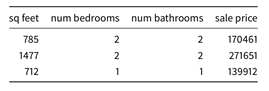

Our job is to use the size (sq_feet), the number of bedrooms, and the number of bathrooms in each house to try to predict the house’s final sale price. 

If you open up the file and skim through it, you’ll see that there are no missing values and no bad data. You won’t always be so lucky, though. It’s important to always check your data for problems and inconsistencies. Bad data is the most common source of problems in machine learning models. 

### Preparing the dataset

The first step of our program is to import all the libraries we’ll be using and also mount our google drive. 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib

In [ ]:
# mount your google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# change working director
#%cd "/content/drive/MyDrive/Colab Notebooks/goML"

Next, we’ll use the pandas library to load the contents of the CSV into a table in memory. This will make the data easy to work with: 

In [ ]:
#Load our data set
df = pd.read_csv("data/house_data.csv")

Our training data has both the inputs (sq_feet, num_bedrooms, num_bathrooms) and the expected output (sale_price) in the same table. 

We need to split the data into two separate tables. By convention, machine learning programmers give these two tables special names. 

*	X is the table that has all the input features that the model will use to make predictions. 
* y has the matching expected output for each row of training data in the X table. 

We can create X and y by grabbing the columns we want out of the data we already loaded and saving them as separate tables: 


In [ ]:
# Create the X and y arrays
X = df[["sq_feet", "num_bedrooms", "num_bathrooms"]]
y = df["sale_price"]

Right now, X contains all of our house details and y contains all of the corresponding prices. But if we use all 50,000 house prices to train the model, we won’t have a good way to test the model to verify that it’s actually working. 

The solution is to split the training data into two groups: 


1.   75 percent of the data will be used to train the model. The model will get to see the y values for these houses. This is called the Training Data Set.
2.   25 percent of the data will be kept secret and used to test the model. The model will only be allowed to see the X values and we’ll check its prediction for each one against the real y values. This is called the Test Data Set. 

Getting this right is critical. You never want to test a model with data it saw during the training process. Otherwise, it can just memorize each answer without having to actually solve the problem. 

Scikit-learn provides a function that splits the data into a training set and test set that we can use: 


In [ ]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Now we are ready to create our machine learning model. Any model that uses a set of input values to predict an output number is called a regression model. We can choose from any machine learning regression algorithm that our libraries support to solve this problem. 



### Create, train and save the model


Let’s try out that algorithm. To use it in scikit-learn, you just create a new LinearRegression object

In [ ]:
# Create the Linear Regression model
model = LinearRegression()

That’s it! Now we are ready to train the model. You always do that by calling **fit()** on the model and passing in the X and y values to use for training: 

In [ ]:
# Train the model
model.fit(X_train, y_train)

This will train the model to look at each row in the X_train table and predict the matching value in y_train array. 

Next, we can save the trained model object to disk so that we can use it to make predictions later. In Python, the joblib library makes it easy to save objects to disk and re-load them later: 

In [ ]:
# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'models/house_value_model.pkl')

### Evaluating the model

Finally, we can check the model to see how well it performs on the training data and the test data. Scikit-learn has a helpful function called **mean_absolute_error** that does this for us. It compares the real answers from the y array against the predictions from our model and figures out how wrong the model is, on average. 

In [ ]:
# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

This means that the model can predict the value of any house in the training data set with an average error of plus or minus $9,106. For the test set, it has nearly the same average error amount. That means things are working great! 

### Hyper-parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define model to get a baseline
model = Ridge()
# Train the model
model.fit(X_train, y_train)
# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Let's use a ridge regression algorithm.

As a grid search, we cannot define a distribution to sample and instead must define a discrete grid of hyperparameter values. As such, we will specify the “alpha” argument as a range of values on a log-10 scale.

In [ ]:
# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space

For a list of hyper parameter that can 
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

User Guide:
- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression



In [ ]:
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [ ]:
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)

Running the example may take a minute. It is fast because we are using a small search space and a fast model to fit and evaluate. Again, you may see some warnings during the optimization for invalid configuration combinations. These can be safely ignored.

At the end of the run, the best score and hyperparameter configuration that achieved the best performance are reported.

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

### Retrain

In [ ]:
from sklearn.model_selection import cross_val_score

# define model to get a baseline
model = Ridge(alpha='1e-05', solver='cholesky')
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

### Activity wrap-up
We leant how to:
* use GridSearchCV to optimise a machine learning model to estimate the price of a house 